In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler #or normalize?
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.correlation import plot_corr
%matplotlib inline


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.




Variable Name	Description
Carat	 Carat weight of the cubic zirconia.
Cut	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color 	 Colour of the cubic zirconia.With D being the best and J the worst.
Clarity	 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
Depth	 The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price	 the Price of the cubic zirconia.
X	 Length of the cubic zirconia in mm.
Y	 Width of the cubic zirconia in mm.
Z	 Height of the cubic zirconia in mm.


### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.	

In [2]:
zirconia_df=pd.read_csv('cubic_zirconia.csv')

In [3]:
zirconia_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
zirconia_df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [5]:
zirconia_df.set_index('index',inplace=True)

In [6]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [163]:
zirconia_df.shape

(26967, 10)

In [164]:
zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
carat      26967 non-null float64
cut        26967 non-null object
color      26967 non-null object
clarity    26967 non-null object
depth      26270 non-null float64
table      26967 non-null float64
x          26967 non-null float64
y          26967 non-null float64
z          26967 non-null float64
price      26967 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [165]:
zirconia_df.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [11]:
zirconia_df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [12]:
round(zirconia_df.isnull().sum()/len(zirconia_df)*100,2)

carat      0.00
cut        0.00
color      0.00
clarity    0.00
depth      2.58
table      0.00
x          0.00
y          0.00
z          0.00
price      0.00
dtype: float64

##### Check for duplicates

In [7]:
zirconia_df.duplicated().sum()

34

In [8]:
zirconia_df.drop_duplicates(inplace=True)

In [9]:
zirconia_df.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AEA815FA08>,
      dtype=object)

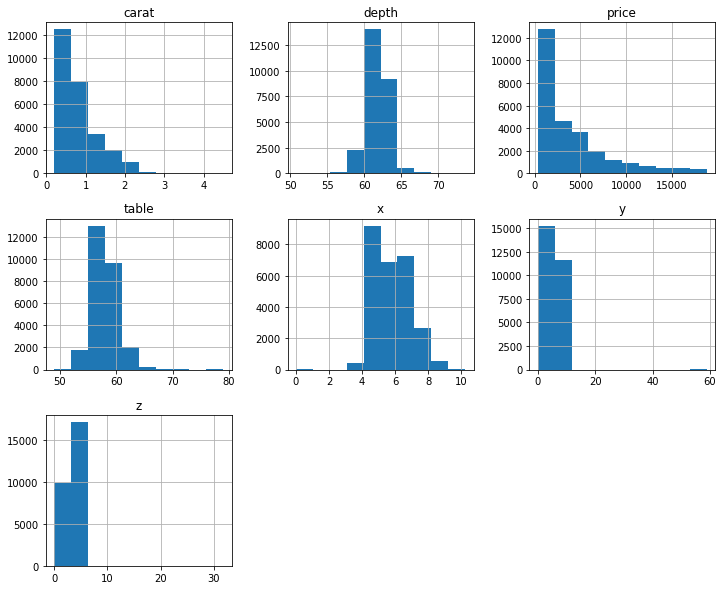

In [169]:
zirconia_df.hist(figsize=(12,10))

In [416]:
zirconia_df[zirconia_df.carat>2.5].count()

carat      68
cut        68
color      68
clarity    68
depth      68
table      68
x          68
y          68
z          68
price      68
dtype: int64

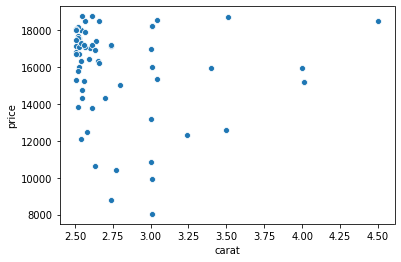

In [417]:
sns.scatterplot('carat','price',data=zirconia_df[zirconia_df.carat>2.5])

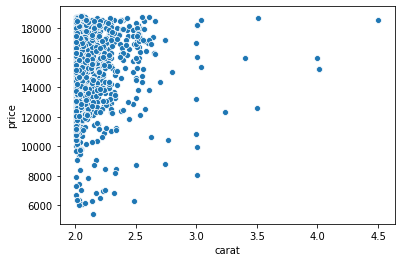

In [418]:
sns.scatterplot('carat','price',data=zirconia_df[zirconia_df.carat>2])

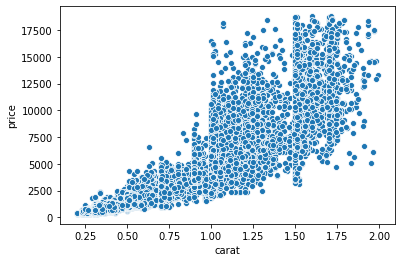

In [420]:
sns.scatterplot('carat','price',data=zirconia_df[zirconia_df.carat<2])

Text(0.5, 1.0, 'Carat vs Price')

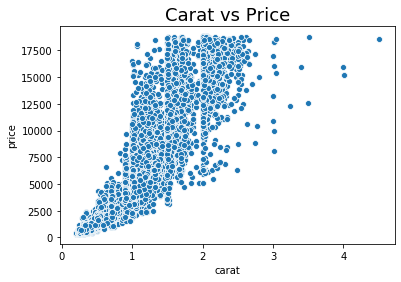

In [104]:
a=sns.scatterplot('carat','price',data=zirconia_df)
a.set_title('Carat vs Price',fontsize=18)

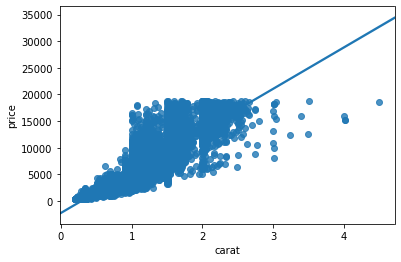

In [105]:
sns.regplot('carat','price',data=zirconia_df)

In [419]:
zirconia_df[(zirconia_df.carat>2)]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
80,2.16,4,3,2,62.3,57.0,8.29,8.22,5.14,11473
120,2.02,3,1,2,62.4,55.0,8.05,8.11,5.04,11757
125,2.80,4,2,2,61.1,59.0,9.03,8.98,5.50,15030
136,2.20,5,4,2,59.9,57.0,8.54,8.49,5.10,14691
205,2.01,4,4,2,59.4,58.0,8.19,8.15,4.85,15562
...,...,...,...,...,...,...,...,...,...,...
26746,2.01,4,3,2,60.5,61.0,8.14,8.09,4.91,16287
26846,2.23,4,1,5,61.7,58.0,8.41,8.34,5.17,16025
26870,3.24,4,3,1,62.1,58.0,9.44,9.40,5.85,12300


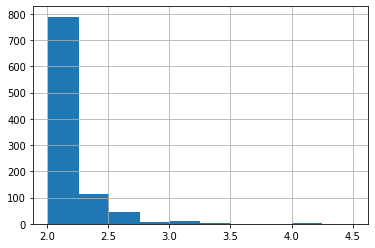

In [415]:
zirconia_df.carat[(zirconia_df.carat>2)].hist()

There are huge outliers in carat weight. 25% of data lie in the last quartile. Since weight of variable highly depends on the weight of the carat, instead of replacing carat > Q75% value with 75% quartile value, I am dropping records with extreme outliers.

Linear regression is sensitive to outliers and these records would disrupt the model. A separate model has to be created for stones with weight > 2.5.
Records with carat > 2.5 ,966 records,make 3.5% of data. 

In [414]:
(949+17)/len(zirconia_df)

0.035872108136210036

In [101]:
zirconia_df.get_dtype_counts()

C:\Users\chith\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `get_dtype_counts` has been deprecated and will be removed in a future version. For DataFrames use `.dtypes.value_counts()
  """Entry point for launching an IPython kernel.


float64    6
int64      1
object     3
dtype: int64

In [102]:
zirconia_df.select_dtypes(include='object')

,cut,color,clarity
index,,,
1,Ideal,E,SI1
2,Premium,G,IF
3,Very Good,E,VVS2
4,Ideal,F,VS1
5,Ideal,F,VVS1
...,...,...,...
26963,Premium,G,SI1
26964,Ideal,H,IF
26965,Premium,E,VS2


In [60]:
zirconia_df.cut.value_counts(normalize=True).round(2)

Ideal        0.40
Premium      0.26
Very Good    0.22
Good         0.09
Fair         0.03
Name: cut, dtype: float64

In [64]:
zirconia_df.color.value_counts(normalize=True).round(2).sort_index()

D    0.12
E    0.18
F    0.18
G    0.21
H    0.15
I    0.10
J    0.05
Name: color, dtype: float64

In [65]:
zirconia_df.clarity.value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [99]:
cont_var=zirconia_df.select_dtypes(exclude='object')
#cont_var=cont_var.drop('price',axis=1)

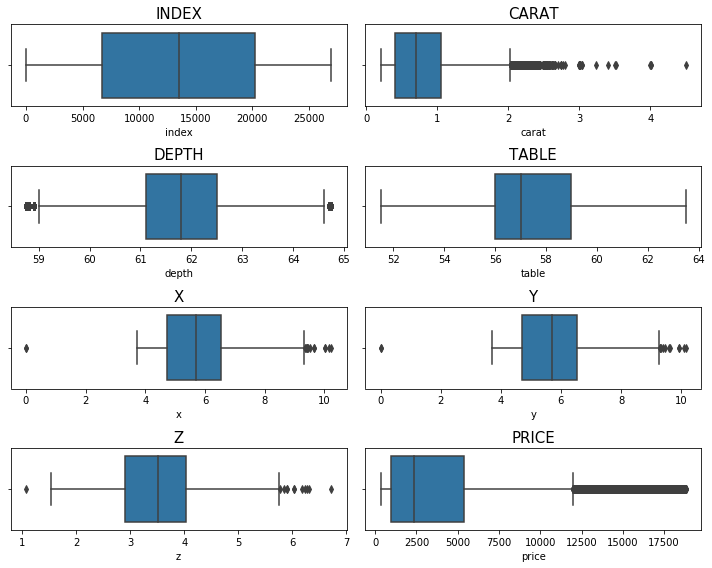

In [102]:
data_plot=cont_var
fig=plt.figure(figsize=(10,8))
for i in range(0,len(cont_var.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i].upper(),fontsize=15)
plt.tight_layout()
plt.show()


In [45]:
zirconia_df[zirconia_df.y==zirconia_df.y.max()]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
25796,2.0,Premium,H,SI2,58.9,57.0,8.09,58.9,8.06,12210


In [48]:
zirconia_df[zirconia_df.z==zirconia_df.z.max()]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
345,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.8,1970


In [49]:
zirconia_df[zirconia_df.z==zirconia_df.z.min()]
#z is height. Height cannot be zero. It is missing value

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [50]:
zirconia_df[zirconia_df.x==zirconia_df.x.min()]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [51]:
zirconia_df[zirconia_df.y==zirconia_df.y.min()]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17507,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [507]:
indx=zirconia_df.loc[zirconia_df.x==0].index
zirconia_df.drop(indx,inplace=True)

In [34]:
zirconia_df.drop(25796,inplace=True)

In [35]:
zirconia_df.drop(345,inplace=True)

In [36]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
2,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
3,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779


In [69]:
zirconia_df.reset_index('index',inplace=True)

###### Handling zeros in z with grouped average z value of  similar records

In [37]:
zirconia_df[zirconia_df.z==zirconia_df.z.min()]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
5822,0.71,2,5,2,64.10,60.0,0.00,0.00,0.0,2130
6035,2.02,4,3,4,62.70,53.0,8.02,7.95,0.0,18207
10828,2.20,4,3,3,61.20,59.0,8.42,8.37,0.0,17265
12499,2.18,4,3,2,59.40,61.0,8.49,8.45,0.0,12631
12690,1.10,4,4,2,63.00,59.0,6.50,6.47,0.0,3696
17507,1.14,1,4,5,58.75,63.5,0.00,0.00,0.0,6381
18195,1.01,4,3,1,58.75,59.0,6.66,6.60,0.0,3167
23759,1.12,4,4,1,60.40,59.0,6.71,6.67,0.0,2383


In [38]:
#Try Predict z with x and y

In [39]:
#Replace 0's in z for carat>2 with 4.87
zirconia_df[(zirconia_df.cut=='Premium')&(zirconia_df.x>=8)&(zirconia_df.x<=8.5)&(zirconia_df.color=='H')].groupby(round(zirconia_df.carat,0)).mean()

C:\Users\chith\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,carat,cut,color,clarity,depth,table,x,y,z,price
carat,,,,,,,,,,


In [40]:
#Replace 1's in z for carat around 1 with 4.0
zirconia_df[(zirconia_df.cut=='Premium')&(zirconia_df.x>=6.5)&(zirconia_df.x<=6.75)].groupby(round(zirconia_df.carat,0)).mean()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,,,,,,,,,,


In [41]:
z_updated=[]
for ind,temp_df in zirconia_df.iterrows():
    if (temp_df.carat>2) & (temp_df.z==0.0):
        val=4.87
    elif (temp_df.carat<2) & (temp_df.z==0.0):
        val=4
    else:
        val=temp_df.z
    z_updated.append(val)

In [73]:
zirconia_df['z']=z_updated

In [514]:
#There is no significant outliers excepth table and depth. 
#Rest I am going to leave it like that.

In [42]:
def remove_outlier(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [43]:
lr,ur=remove_outlier(zirconia_df.table)
zirconia_df.table=np.where(zirconia_df.table>ur,ur,zirconia_df.table)
zirconia_df.table=np.where(zirconia_df.table<lr,lr,zirconia_df.table)

In [44]:
lr,ur=remove_outlier(zirconia_df.depth)
zirconia_df.depth=np.where(zirconia_df.depth>ur,ur,zirconia_df.depth)
zirconia_df.depth=np.where(zirconia_df.depth<lr,lr,zirconia_df.depth)

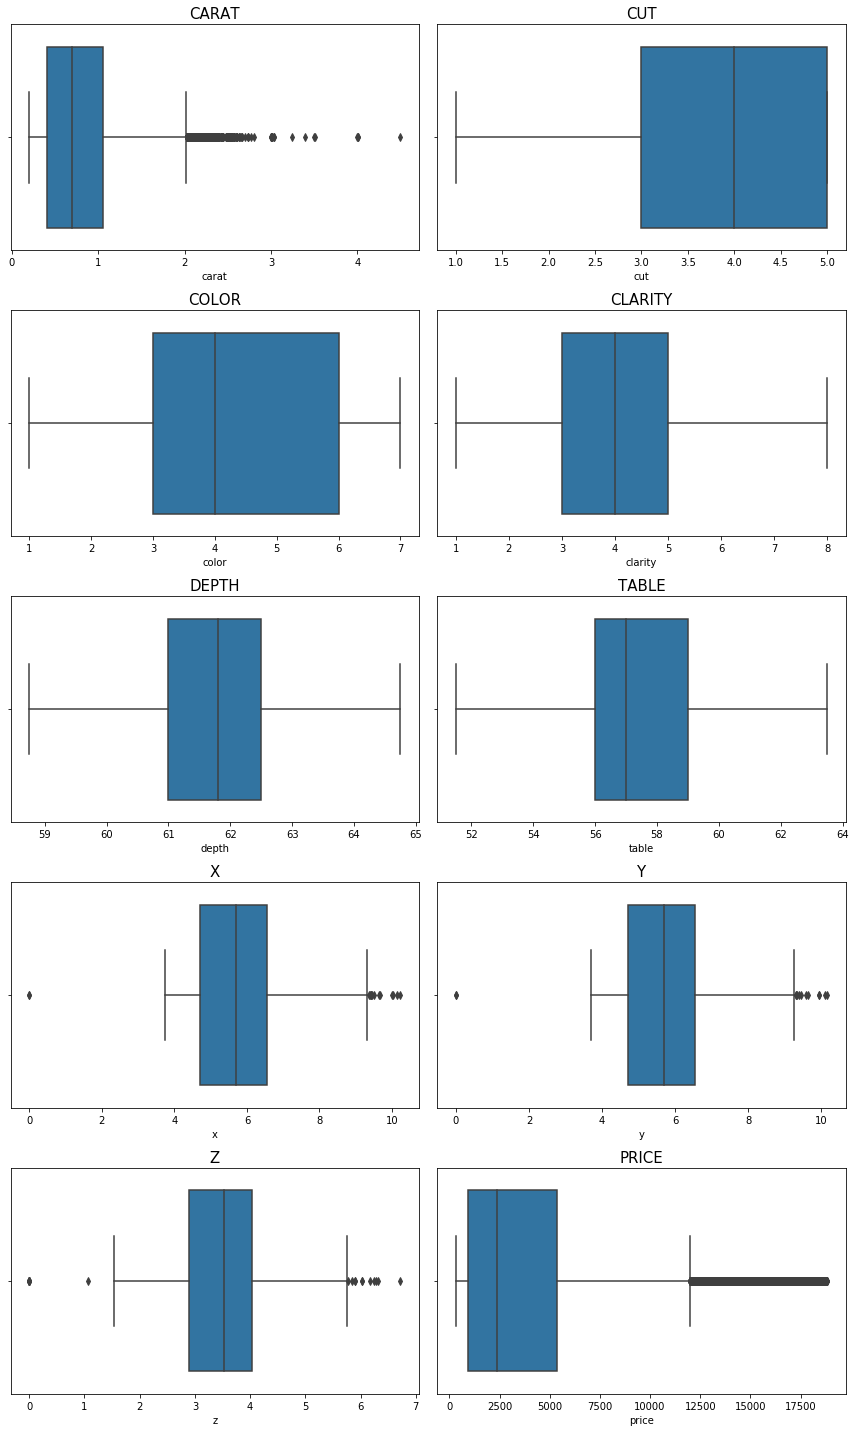

In [45]:
cont_var=zirconia_df.select_dtypes(exclude='object')
data_plot=cont_var
fig=plt.figure(figsize=(12,20))
for i in range(0,len(cont_var.columns)):
    ax=fig.add_subplot(5,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i].upper(),fontsize=15)
plt.tight_layout()
plt.show()


##### Handling Null Value

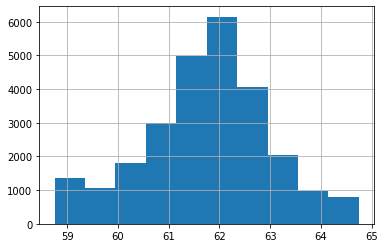

In [46]:
zirconia_df.depth.hist()

In [185]:
zirconia_df.depth.describe()

count    26233.000000
mean        61.744276
std          1.259255
min         58.750000
25%         61.000000
50%         61.800000
75%         62.500000
max         64.750000
Name: depth, dtype: float64

In [152]:
#Mean and median is almost same.I am going to impute with median

In [47]:
zirconia_df.depth.fillna(zirconia_df.depth.median(),inplace=True)

In [48]:
zirconia_df.depth.isnull().sum()

0

In [49]:
zirconia_df_copy=zirconia_df.copy()

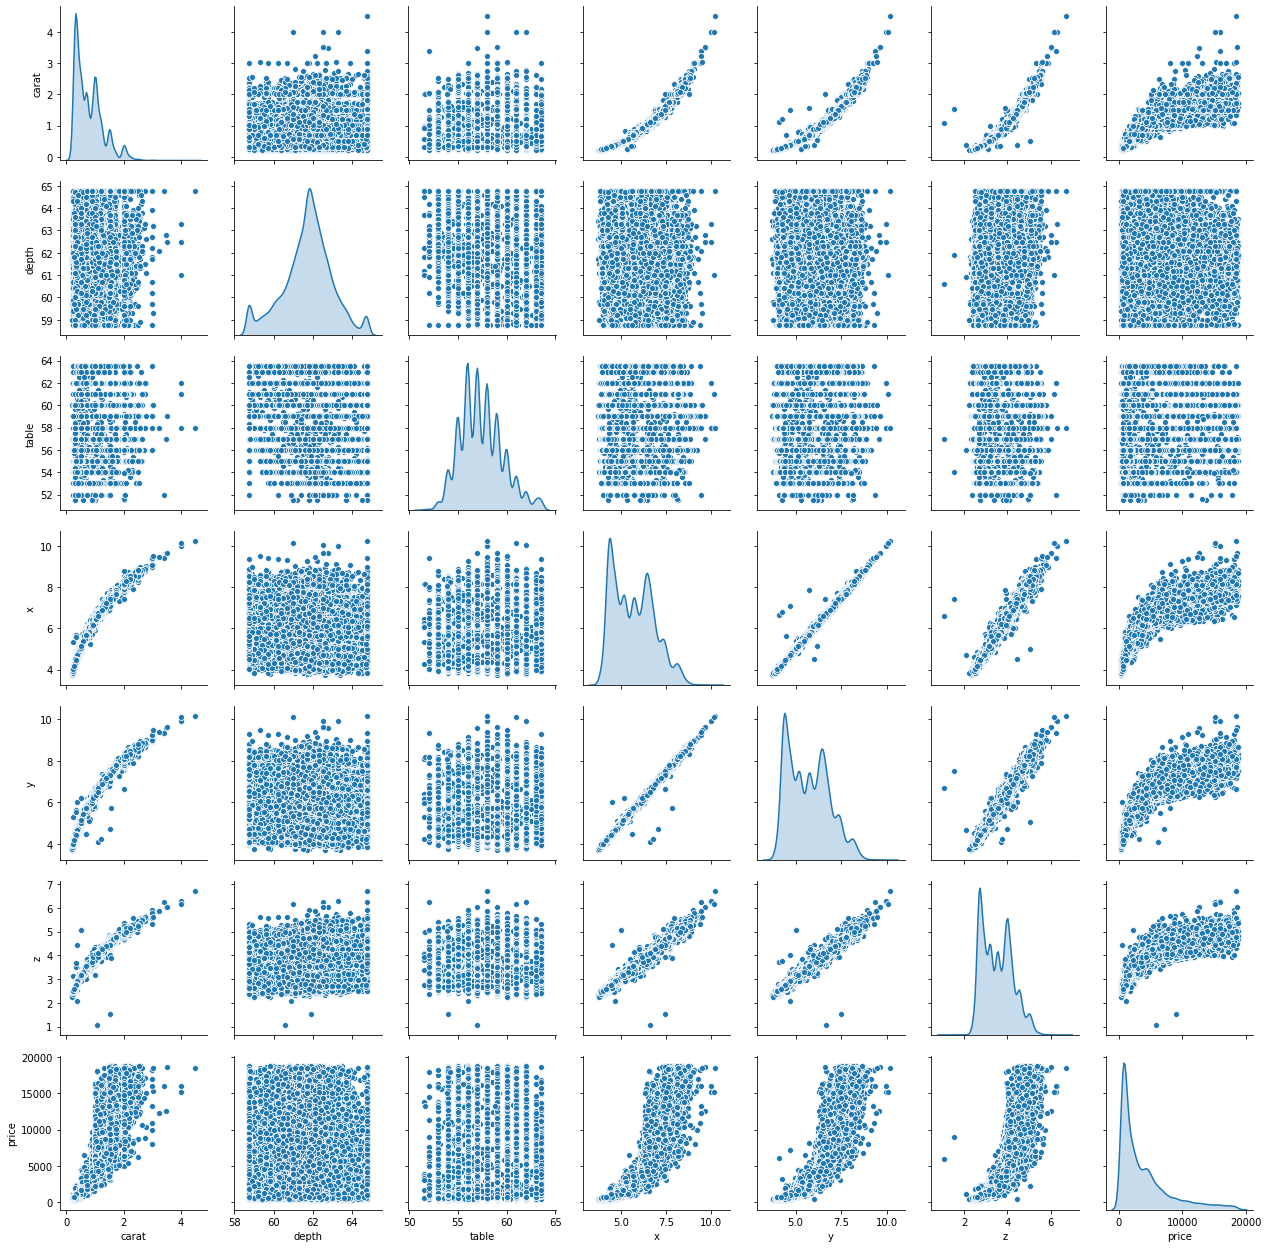

In [241]:
sns.pairplot(cont_var,diag_kind='kde')
plt.savefig('pairplot.jpg')

In [188]:
#Looking at the histogram, distribution of carat and price seem to follow a similat trend.carat>2,
#there is a huge increase in price

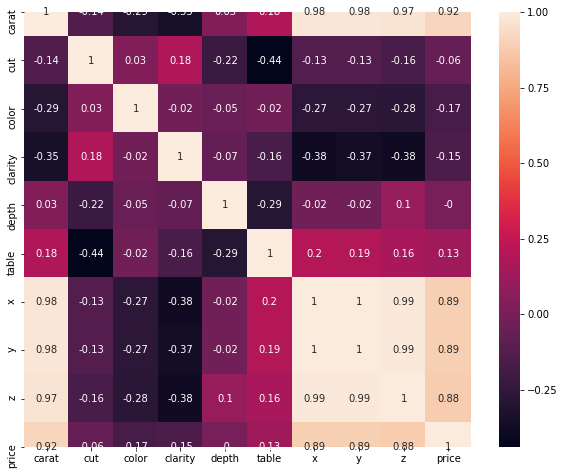

In [50]:
cont_var=zirconia_df.select_dtypes(exclude='object')
plt.figure(figsize=(10,8))
sns.heatmap(cont_var.corr().round(2),annot=True)

In [ ]:
#Target variable price is highly correlated to carat,x,y and z
#There is no correlation between price and depth,table
#x,y and z are highly correlated
#carat is highly correlated to x,y and z
#There is no correlation between table and depth

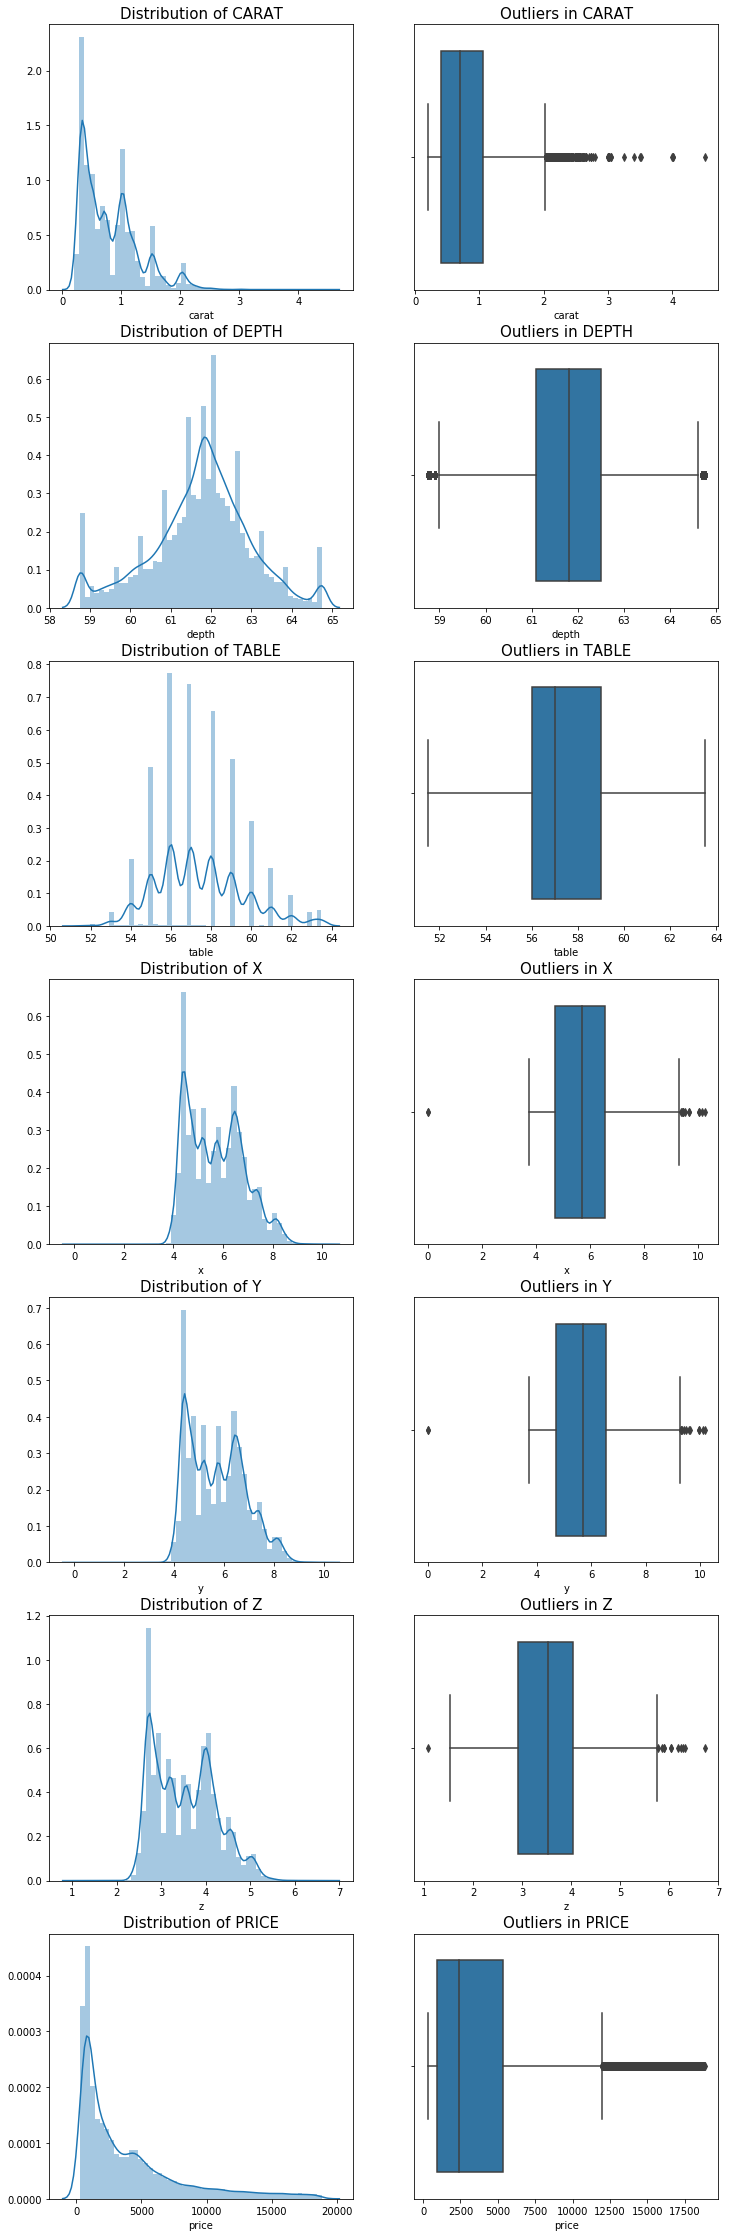

In [116]:
fig,axes=plt.subplots(7,2)
fig.set_size_inches(12,40)
i=0
for col in cont_var.columns:
    a=sns.distplot(cont_var[col],ax=axes[i][0])
    a.set_title('Distribution of '+col.upper(),fontsize=15)
    a.set_title('Outliers in '+col.upper(),fontsize=15)
    i=i+1
plt.savefig('univariate_analysis.jpg')

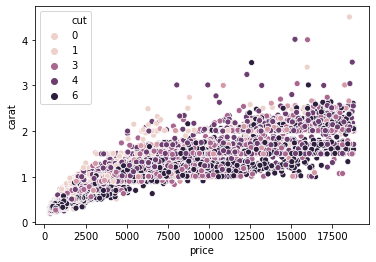

In [51]:
sns.scatterplot(y='carat',x='price',hue='cut',data=zirconia_df)

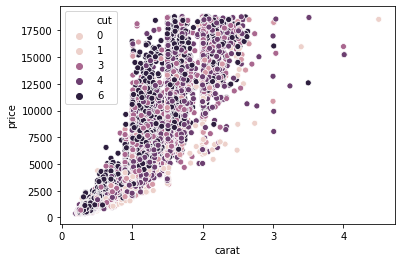

In [411]:
sns.scatterplot(x='carat',y='price',hue='cut',data=zirconia_df)

In [ ]:
Cut,color and clarity are objects. Rest are numerical variables
Depth has 697 null values(2.58%)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?	

In [ ]:
#carat ranges between 0.2 and 4.5
#x and y lie between 3.7 and 10.3
#z lie between 1 and 6.75
#depth and table lie between 50 and 80
#Variables are either single digit and two digit.

#We can speed up gradient descent by scaling. This is because θ will descend quickly on small ranges and slowly on
#large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
#Gradient Descent: Calculation speed increase as Theta calculation becomes faster after feature scaling.

To find the best line, weights are updated every iteration so as to minimize error(RMSE). If predictors are in different scale,
one will converge faster and other will take a long time to converge during optimization. 
Since the values are spread over smaller range, I am not scaling the data.

In regression, it is often recommended to center the variables so that the predictors have mean 0. This makes it so the intercept term is interpreted as the expected value of Yi when the predictor values are set to their means. Otherwise, the intercept is interpreted as the expected value of Yi when the predictors are set to 0, which may not be a realistic or interpretable situation (e.g. what if the predictors were height and weight?). Another practical reason for scaling in regression is when one variable has a very large scale, e.g. if you were using population size of a country as a predictor. In that case, the regression coefficients may be on a very small order of magnitude (e.g. 10−6) which can be a little annoying when you're reading computer output, so you may convert the variable to, for example, population size in millions. The convention that you standardize predictions primarily exists so that the units of the regression coefficients are the same.



### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [52]:
zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 1 to 26967
Data columns (total 10 columns):
carat      26931 non-null float64
cut        26931 non-null int32
color      26931 non-null int32
clarity    26931 non-null int32
depth      26931 non-null float64
table      26931 non-null float64
x          26931 non-null float64
y          26931 non-null float64
z          26931 non-null float64
price      26931 non-null int64
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.2 MB


In [55]:
zirconia_df.cut.value_counts()

5    10805
4     6885
3     6026
2     2435
1      780
Name: cut, dtype: int64

In [ ]:
Fair, Good, Very Good, Premium, Ideal.

In [54]:
zirconia_df.cut=np.where(zirconia_df.cut=='Fair','1',zirconia_df.cut)
zirconia_df.cut=np.where(zirconia_df.cut=='Good','2',zirconia_df.cut)
zirconia_df.cut=np.where(zirconia_df.cut=='Very Good','3',zirconia_df.cut)
zirconia_df.cut=np.where(zirconia_df.cut=='Premium','4',zirconia_df.cut)
zirconia_df.cut=np.where(zirconia_df.cut=='Ideal','5',zirconia_df.cut)

C:\Users\chith\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [56]:
zirconia_df.cut.value_counts()

5    10805
4     6885
3     6026
2     2435
1      780
Name: cut, dtype: int64

In [15]:
zirconia_df.color.value_counts().sort_index()

D    3341
E    4916
F    4723
G    5653
H    4095
I    2765
J    1440
Name: color, dtype: int64

In [16]:
#Colour of the cubic zirconia.With D being the best and J the worst.
zirconia_df.color=np.where(zirconia_df.color=='J','1',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='I','2',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='H','3',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='G','4',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='F','5',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='E','6',zirconia_df.color)
zirconia_df.color=np.where(zirconia_df.color=='D','7',zirconia_df.color)

In [57]:
zirconia_df.color.value_counts().sort_index()

1    1440
2    2765
3    4094
4    5653
5    4723
6    4915
7    3341
Name: color, dtype: int64

In [18]:
zirconia_df.clarity.value_counts()


SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

In [19]:
#In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
zirconia_df.clarity=np.where(zirconia_df.clarity=='I1',1,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='SI2',2,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='SI1',3,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='VS2',4,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='VS1',5,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='VVS2',6,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='VVS1',7,zirconia_df.clarity)
zirconia_df.clarity=np.where(zirconia_df.clarity=='IF',8,zirconia_df.clarity)

In [58]:
zirconia_df.clarity.value_counts()

3    6565
4    6093
2    4563
5    4086
6    2530
7    1839
8     891
1     364
Name: clarity, dtype: int64

In [59]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
1,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
2,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
3,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779


In [22]:
zirconia_df.cut=zirconia_df.cut.astype(int)

In [23]:
zirconia_df.clarity=zirconia_df.clarity.astype(int)

In [24]:
zirconia_df.color=zirconia_df.color.astype(int)

In [25]:
zirconia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
carat      26933 non-null float64
cut        26933 non-null int32
color      26933 non-null int32
clarity    26933 non-null int32
depth      26236 non-null float64
table      26933 non-null float64
x          26933 non-null float64
y          26933 non-null float64
z          26933 non-null float64
price      26933 non-null int64
dtypes: float64(6), int32(3), int64(1)
memory usage: 2.0 MB


In [26]:
zirconia_df.corr().round(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.00,-0.14,-0.29,-0.35,0.03,0.18,0.98,0.94,0.94,0.92
cut,-0.14,1.00,0.03,0.18,-0.22,-0.44,-0.13,-0.13,-0.15,-0.06
color,-0.29,0.03,1.00,-0.02,-0.05,-0.02,-0.27,-0.26,-0.27,-0.17
clarity,-0.35,0.18,-0.02,1.00,-0.07,-0.16,-0.38,-0.36,-0.36,-0.15
depth,0.03,-0.22,-0.05,-0.07,1.00,-0.30,-0.02,-0.03,0.10,-0.00
table,0.18,-0.44,-0.02,-0.16,-0.30,1.00,0.20,0.19,0.15,0.13
x,0.98,-0.13,-0.27,-0.38,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.13,-0.26,-0.36,-0.03,0.19,0.96,1.00,0.93,0.86
z,0.94,-0.15,-0.27,-0.36,0.10,0.15,0.96,0.93,1.00,0.85
price,0.92,-0.06,-0.17,-0.15,-0.00,0.13,0.89,0.86,0.85,1.00


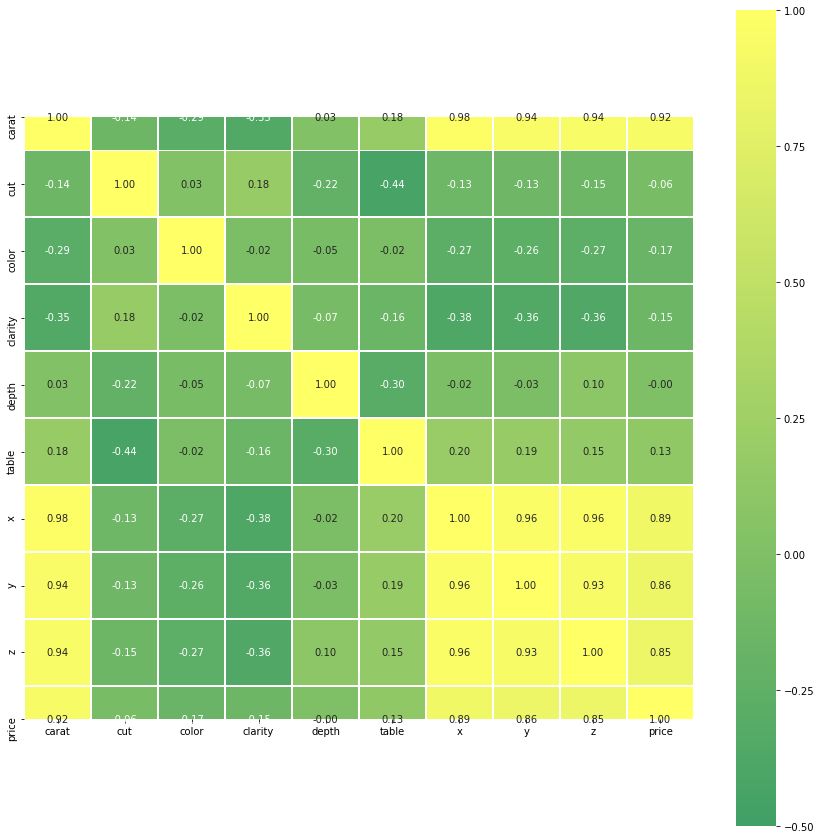

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(zirconia_df.corr(),annot=True,vmin=-0.5,center=0,square=True,fmt='.2f',linewidths=.5,cmap='summer')
plt.savefig('heatmap.jpg')

In [60]:
log_price=np.log(zirconia_df.price)

### Train-Test Split

In [61]:
y=zirconia_df.price
X=zirconia_df.drop('price',axis=1)

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [63]:
print('Training Set size : ',X_train.shape,y_train.shape)
print('Testing Set size',X_test.shape,y_test.shape)

Training Set size :  (21544, 9) (21544,)
Testing Set size (5387, 9) (5387,)


#### Linear Regression Model

In [64]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
regression_model.coef_[0]

10603.412501242483

In [66]:
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[idx]))

The coefficient for carat is 10603.412501242483
The coefficient for cut is 128.37750499161186
The coefficient for color is 326.6331497195648
The coefficient for clarity is 500.6720099108972
The coefficient for depth is -24.08240086976018
The coefficient for table is -21.220841966943315
The coefficient for x is -2060.2301039445765
The coefficient for y is 1697.043165964389
The coefficient for z is -683.440499750283


In [67]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1292.8530890353895


In [68]:
# R square on training data
regression_model.score(X_train, y_train)

0.9066264891080884

In [69]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9171434749314346

In [70]:
residual=regression_model.predict(X_test)-y_test

In [71]:
# Calculate MSE
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

1177.4421230850426

### log price

In [99]:
zirconia_df['log_price']=log_price

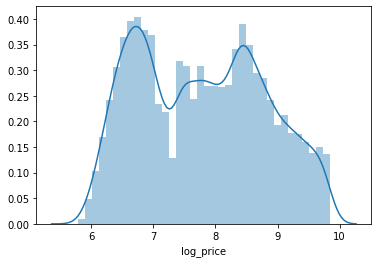

In [74]:
sns.distplot(zirconia_df.log_price)

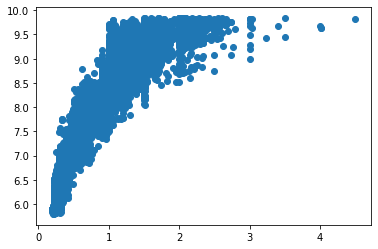

In [250]:
plt.scatter(zirconia_df.carat,zirconia_df.log_price)

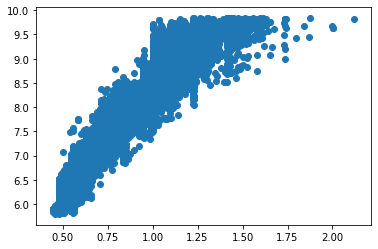

In [251]:
plt.scatter(zirconia_df.carat_sqrt,zirconia_df.log_price)

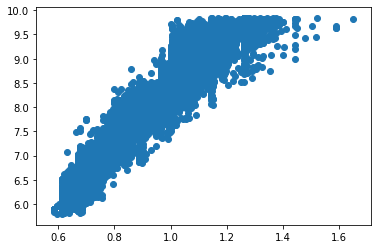

In [252]:
plt.scatter(zirconia_df.carat_cbrt,zirconia_df.log_price)

In [249]:
zirconia_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,carat_sqrt,log_price,carat_cbrt
index,,,,,,,,,,,,,
1,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499,0.547723,6.212606,0.669433
2,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984,0.574456,6.891626,0.691042
3,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289,0.948683,8.746557,0.965489
4,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082,0.648074,6.986566,0.748887
5,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779,0.556776,6.658011,0.676790


In [75]:
y=zirconia_df.log_price
X=zirconia_df.drop(['price','log_price'],axis=1)

In [80]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regression_model1 = LinearRegression()
regression_model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [81]:
print("Intercept : ",regression_model1.intercept_)
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model1.coef_[idx]))

Intercept :  -3.9509102490041226
The coefficient for carat is -0.8521757804195066
The coefficient for cut is 0.023770440034057892
The coefficient for color is 0.07914138288025108
The coefficient for clarity is 0.11940034584935232
The coefficient for depth is 0.05487246021640888
The coefficient for table is 0.009038903087941839
The coefficient for x is 0.8100906648561487
The coefficient for y is 0.4281180273915826
The coefficient for z is 0.13756063689093123


In [85]:
print("Training score :",regression_model1.score(X_train, y_train))
print("Testing score :",regression_model1.score(X_test, y_test))
      
residual=regression_model1.predict(X_test)-y_test
# Calculate MSE
mse = np.mean((regression_model1.predict(X_test)-y_test)**2)
math.sqrt(mse)     

Training score : 0.9719815487320171
Testing score : 0.9784897871545677


0.14973231180398294

## Log price, Square root of carat

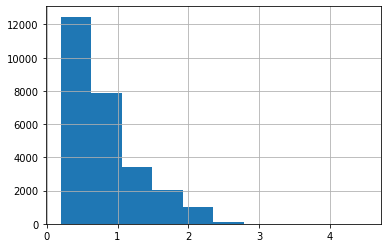

In [86]:
zirconia_df.carat.hist()

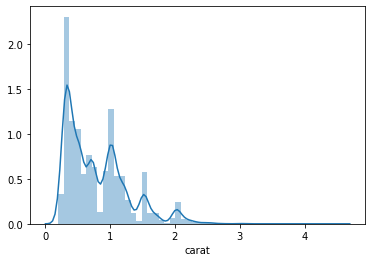

In [87]:
sns.distplot(zirconia_df.carat)

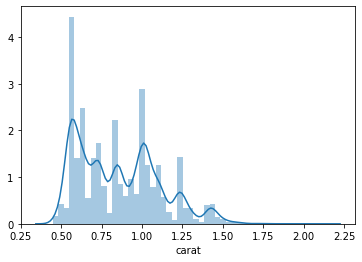

In [89]:
sns.distplot(np.sqrt(zirconia_df.carat))

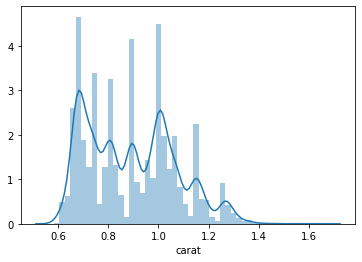

In [90]:
sns.distplot(np.cbrt(zirconia_df.carat))

In [112]:
carat_sqrt=np.sqrt(zirconia_df.carat)
zirconia_df['carat_sqrt']=carat_sqrt

In [113]:
y=zirconia_df.log_price
X=zirconia_df.drop(['price','log_price','carat','carat_cbrt'],axis=1)

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
print("Intercept : ",regression_model2.intercept_)
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model2.coef_[idx]))

Intercept :  -2.076942317461004
The coefficient for cut is 0.021816124032515052
The coefficient for color is 0.08412912922582763
The coefficient for clarity is 0.11651672300207654
The coefficient for depth is 0.04402509812203639
The coefficient for table is 0.007369278925611005
The coefficient for x is 0.6125309955139838
The coefficient for y is 0.4033145468179903
The coefficient for z is 0.11687606139762721
The coefficient for carat_sqrt is -0.5178274322336758


In [116]:
print("Training score :",regression_model2.score(X_train, y_train))
print("Testing score :",regression_model2.score(X_test, y_test))
      
residual=regression_model2.predict(X_test)-y_test
# Calculate MSE
mse = np.mean((regression_model2.predict(X_test)-y_test)**2)
math.sqrt(mse)     

Training score : 0.9652276645574617
Testing score : 0.9700980731655341


0.1765398540934509

## Log price,Cuberoot of carat

In [104]:
carat_cbrt=np.cbrt(zirconia_df.carat)
zirconia_df['carat_cbrt']=carat_cbrt

In [117]:
y=zirconia_df.log_price
X=zirconia_df.drop(['price','log_price','carat','carat_sqrt'],axis=1)

In [118]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regression_model3 = LinearRegression()
regression_model3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
print("Intercept : ",regression_model3.intercept_)
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model3.coef_[idx]))

Intercept :  1.2167153895818146
The coefficient for cut is 0.026202958802214522
The coefficient for color is 0.08531958747076071
The coefficient for clarity is 0.11764223473081921
The coefficient for depth is 0.000807913988475266
The coefficient for table is -9.893946051299862e-05
The coefficient for x is -0.03862475856202665
The coefficient for y is 0.11421901654248014
The coefficient for z is -0.010447354583699022
The coefficient for carat_cbrt is 5.790064408977556


In [120]:
print("Training score :",regression_model3.score(X_train, y_train))
print("Testing score :",regression_model3.score(X_test, y_test))
      
residual=regression_model3.predict(X_test)-y_test
# Calculate MSE
mse = np.mean((regression_model3.predict(X_test)-y_test)**2)
math.sqrt(mse)     

Training score : 0.9694243563605763
Testing score : 0.9700492981227912


0.17668377843734073

## Drop depth,table

In [195]:
y=zirconia_df.log_price
#X=zirconia_df.drop(['price','log_price','carat','carat_sqrt','depth','table','x','y','z'],axis=1)
X=zirconia_df.drop(['price','log_price','carat','carat_sqrt','x','y','z'],axis=1)

In [196]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
regression_model4 = LinearRegression()
regression_model4.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
print("Intercept : ",regression_model4.intercept_)
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model4.coef_[idx]))

Intercept :  1.563723362045268
The coefficient for cut is 0.025929931205916905
The coefficient for color is 0.08533776873206529
The coefficient for clarity is 0.1179682364340249
The coefficient for depth is -0.003873723064357832
The coefficient for table is -0.0010306658460178327
The coefficient for carat_cbrt is 6.228502857148308


In [198]:
print("Training score :",regression_model4.score(X_train, y_train))
print("Testing score :",regression_model4.score(X_test, y_test))
      
residual=regression_model4.predict(X_test)-y_test
# Calculate MSE
mse = np.mean((regression_model4.predict(X_test)-y_test)**2)
math.sqrt(mse)     

Training score : 0.9693697495922011
Testing score : 0.9699471832870329


0.17698471767716245

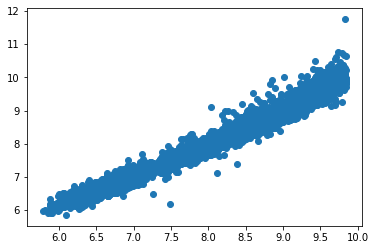

In [194]:
plt.scatter(y_test,regression_model4.predict(X_test))

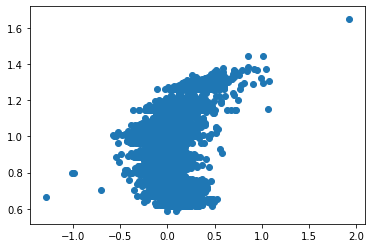

In [128]:
plt.scatter(residual,X_test.carat_cbrt)

In [129]:
out=X_test.copy()
out['y_pred']=regression_model4.predict(X_test)
out['residual']=residual

In [131]:
out[out.residual==out.residual.max()]

,cut,color,clarity,x,y,z,carat_cbrt,y_pred,residual
index,,,,,,,,,
12501,1,1,1,10.23,10.16,6.72,1.650964,11.747766,1.920566


In [134]:
np.exp(11.747766)

126470.70761756208

In [132]:
zirconia_df_copy.loc[12501]

carat          4.50
cut            1.00
color          1.00
clarity        1.00
depth         64.75
table         58.00
x             10.23
y             10.16
z              6.72
price      18531.00
Name: 12501, dtype: float64

In [138]:
pred_log_price=out[out.residual<-0.6]['y_pred']
np.exp(pred_log_price)

index
13632    1627.350350
1964     1222.705585
8875      493.571447
24624     703.265371
Name: y_pred, dtype: float64

In [136]:
zirconia_df_copy.loc[[13632,1964,8875,24624]]

,carat,cut,color,clarity,depth,table,x,y,z,price
index,,,,,,,,,,
13632,0.51,1,5,6,60.70,63.5,5.21,5.11,3.13,4368
1964,0.51,4,5,3,62.70,62.0,5.09,4.96,3.15,3360
8875,0.29,1,5,3,58.75,60.0,4.48,4.41,2.48,1776
24624,0.35,1,4,4,64.75,54.0,5.57,5.53,3.66,1415


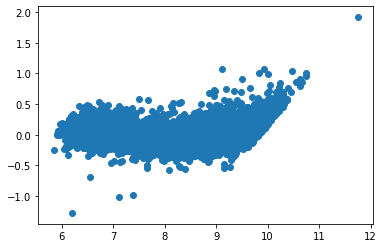

In [139]:
plt.scatter(regression_model4.predict(X_test),residual)

## One hot encoding instead of label encoding

In [143]:
data=pd.read_csv('cubic_zirconia.csv')

In [145]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [147]:
data.duplicated().sum()

34

In [149]:
data.drop_duplicates(inplace=True)

In [152]:

data[data.z==data.z.max()]

,carat,cut,color,clarity,depth,table,x,y,z,price
344,0.51,Very Good,E,VS1,NaN,54.7,5.12,5.15,31.8,1970


In [154]:
data[data.y==data.y.max()]

,carat,cut,color,clarity,depth,table,x,y,z,price
25795,2.0,Premium,H,SI2,58.9,57.0,8.09,58.9,8.06,12210


In [156]:
data.drop([344,25795],inplace=True)

In [153]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [163]:
data_full=pd.get_dummies(data,prefix_sep='_',drop_first=True)

In [209]:
data_full.drop('depth',axis=1,inplace=True)

In [210]:
data_full['depth']=zirconia_df.depth

In [217]:
data_full.depth.fillna(data_full.depth.mean(),inplace=True)

In [218]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26931 entries, 0 to 26966
Data columns (total 24 columns):
table            26931 non-null float64
x                26931 non-null float64
y                26931 non-null float64
z                26931 non-null float64
cut_Good         26931 non-null uint8
cut_Ideal        26931 non-null uint8
cut_Premium      26931 non-null uint8
cut_Very Good    26931 non-null uint8
color_E          26931 non-null uint8
color_F          26931 non-null uint8
color_G          26931 non-null uint8
color_H          26931 non-null uint8
color_I          26931 non-null uint8
color_J          26931 non-null uint8
clarity_IF       26931 non-null uint8
clarity_SI1      26931 non-null uint8
clarity_SI2      26931 non-null uint8
clarity_VS1      26931 non-null uint8
clarity_VS2      26931 non-null uint8
clarity_VVS1     26931 non-null uint8
clarity_VVS2     26931 non-null uint8
log_price        26931 non-null float64
carat_cbrt       26931 non-null float64
depth

In [240]:
y=data_full.log_price
X=data_full.drop(['log_price','x','y','z','depth','table'],axis=1)

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [242]:
regression_model5 = LinearRegression()
regression_model5.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
print("Intercept : ",regression_model5.intercept_)
for idx,col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model5.coef_[idx]))

Intercept :  1.4983372863689608
The coefficient for cut_Good is 0.07690410666369162
The coefficient for cut_Ideal is 0.14060863361521392
The coefficient for cut_Premium is 0.10976131636005305
The coefficient for cut_Very Good is 0.09534315446089452
The coefficient for color_E is -0.059340216356013824
The coefficient for color_F is -0.09287389521811217
The coefficient for color_G is -0.15913048465088855
The coefficient for color_H is -0.2739952411203185
The coefficient for color_I is -0.4144946116509525
The coefficient for color_J is -0.5604845288028435
The coefficient for clarity_IF is 1.1333335717814672
The coefficient for clarity_SI1 is 0.6613583566865413
The coefficient for clarity_SI2 is 0.47577367411105703
The coefficient for clarity_VS1 is 0.8659078223332329
The coefficient for clarity_VS2 is 0.7934370863431823
The coefficient for clarity_VVS1 is 1.0321978593974086
The coefficient for clarity_VVS2 is 0.9801458392420563
The coefficient for carat_cbrt is 6.262852994396563


In [244]:
print("Training score :",regression_model5.score(X_train, y_train))
print("Testing score :",regression_model5.score(X_test, y_test))
      
y_pred=regression_model5.predict(X_test)    
residual=y_pred-y_test
# Calculate MSE
mse = np.mean((y_pred-y_test)**2)
math.sqrt(mse)     

Training score : 0.9743574149379851
Testing score : 0.974587799409512


0.16274749529769864

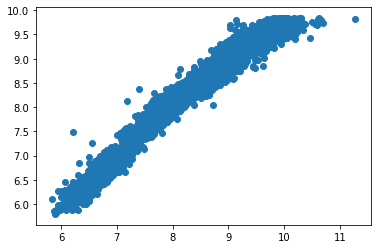

In [245]:
plt.scatter(y_pred,y_test)

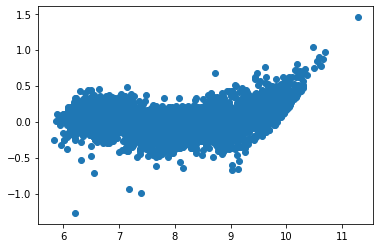

In [246]:
plt.scatter(y_pred,residual)

In [253]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [255]:
mean_absolute_percentage_error(y_test,y_pred) #MAPE - Mean absolute percentage error. % Difference between actual and predicted

1.6266186249175183

### Linear Regression using statsmodels

In [247]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat_cbrt,log_price
2276,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.676790,7.177782
12311,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.071441,9.292750
5031,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.793701,7.423568
8481,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.144714,9.155990
25219,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.062659,7.773174


In [254]:
expr='price ~ carat + cut + clarity + depth + table + x + y + z + color'

In [255]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept    -8603.714532
carat        10860.448418
cut            132.047600
clarity        495.974381
depth          100.310270
table          -20.529022
x            -1770.799301
y             2522.197338
z            -2659.683753
color          325.183100
dtype: float64

In [256]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.366e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        16:48:12   Log-Likelihood:            -1.8359e+05
No. Observations:               21543   AIC:                         3.672e+05
Df Residuals:                   21533   BIC:                         3.673e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8603.7145   1095.650     -7.853      0.0

In [ ]:
# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

##### Removing Multicollinearity

In [257]:
data=X
non_objects=data.select_dtypes(exclude=['object', 'category']).columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[non_objects].values, i) for i in range(data[non_objects].shape[1])]
vif["features"] = data[non_objects].columns

vif.round(1)

,VIF Factor,features
0,92.0,carat
1,17.6,cut
2,8.5,color
3,8.7,clarity
4,1229.5,depth
5,887.2,table
6,10917.5,x
7,9580.1,y
8,3504.5,z


In [258]:
data=data.drop(['z','y','x'],axis=1)
non_objects=data.select_dtypes(exclude=['object', 'category']).columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[non_objects].values, i) for i in range(data[non_objects].shape[1])]
vif["features"] = data[non_objects].columns

vif.round(1)

,VIF Factor,features
0,4.9,carat
1,14.0,cut
2,8.5,color
3,8.4,clarity
4,513.3,depth
5,475.0,table


In [259]:
data=data.drop(['depth','table'],axis=1)
non_objects=data.select_dtypes(exclude=['object', 'category']).columns

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data[non_objects].values, i) for i in range(data[non_objects].shape[1])]
vif["features"] = data[non_objects].columns

vif.round(1)

,VIF Factor,features
0,2.9,carat
1,10.0,cut
2,5.6,color
3,6.2,clarity


In [260]:
data.head()

,carat,cut,color,clarity
index,,,,
1,0.30,5,6,3
2,0.33,4,4,8
3,0.90,3,6,6
4,0.42,5,5,5
5,0.31,5,5,7


In [261]:
X_upd=data
X_train_upd,X_test_upd,y_train,y_test=train_test_split(X_upd,y,test_size=0.2,random_state=1)

In [262]:
print('Training Set size : ',X_train_upd.shape,y_train.shape)
print('Testing Set size',X_test_upd.shape,y_test.shape)

Training Set size :  (21543, 4) (21543,)
Testing Set size (5386, 4) (5386,)


In [263]:
 regression_model2 = LinearRegression()
regression_model2.fit(X_train_upd, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [264]:
regression_model2.coef_

array([8794.43754638,  156.80200165,  322.8892756 ,  526.45361217])

In [265]:
for idx,col in enumerate(X_train_upd.columns):
    print("The coefficient for {} is {}".format(col, regression_model2.coef_[idx]))
    

The coefficient for carat is 8794.43754637694
The coefficient for cut is 156.80200164534764
The coefficient for color is 322.8892755966852
The coefficient for clarity is 526.453612172874


In [266]:
# Let us check the intercept for the model

intercept = regression_model2.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -7251.130691811022


In [267]:
regression_model2.score(X_train_upd,y_train)

0.9043428753433771

In [268]:
regression_model2.score(X_test_upd,y_test)

0.9093276553768604

In [344]:
# Calculate MSE
mse = np.mean((regression_model2.predict(X_test_upd)-y_test)**2)
math.sqrt(mse)

1223.217506908611

In [269]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_upd, y_train], axis=1)
data_train.head()

,carat,cut,color,clarity,price
index,,,,,
7078,2.01,3,3,2,11780
1852,0.34,5,6,3,723
15437,0.71,4,2,7,2572
2091,0.30,5,5,4,776
16577,1.53,5,5,3,11525


In [270]:
expr2='price ~ carat + cut + clarity + color'

In [271]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr2, data = data_train).fit()
lm2.params

Intercept   -7251.130692
carat        8794.437546
cut           156.802002
clarity       526.453612
color         322.889276
dtype: float64

In [272]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 5.091e+04
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        16:55:55   Log-Likelihood:            -1.8403e+05
No. Observations:               21543   AIC:                         3.681e+05
Df Residuals:                   21538   BIC:                         3.681e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7251.1307     53.174   -136.365      0.0

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.	

Final linear regression equation is 
price = b0 + b1*carat + b2*cut + b3*color + b4*clarity +b5*clarity + b6*table

price = -3264 + 8904*carat + 119*cut + 329*color + 533*clarity -38*depth -28*table

When carat increases by 1 unit, price increases by 8904 currency unit, keeping all other predictors constant. 


When cut quality increases by 1 say from fair to Good(Fair(1), Good(2), Very Good(3), Premium(5), Ideal(6)), price increases by 119, keeping all other predictors constant. 
When colour of the cubic zirconia gets better by 1 unit say from J to I(J is the worst, D is the best), price increases by around 322.17, keeping all other predictors constant. 
When clarity increases by 1 say from I3 to I2, price increases by 533, keeping all other predictors constant.

When depth increases by 1 unit, price decreases by -38, keeping all other predictors constant. 
When depth increases by 1 unit, price decreases by -28, keeping all other predictors constant. 

Important attributes are carat,clarity,color and cut

Zirconium carat weight has the most impact on the price  and hence the most important attribute. Heavier the stone,more money we make.

CLarity is the next important attribute.Stone with Internally flawless clarity  cost significantly more( atleast around 3500)when compared to same weight stone with I1 inclusions. 

Price of the stone varies with color.

Cut influences the price of heavier stones.

IncludedI1(1),SI2,SI1,VS2,VS1,VVS2,VVS1,IF(8)Internally flawless,Flawless

Analyse based on cut for different weight range
.
Recommendations:
Stones of weight between 1 and 2 carat weight with good clarity and good color are more profitable.
Stones more than 3 carat weight has to be of good clarity and color to yield more money. Despite higher carat if it has inclusions, price is low


Text(0.5, 1.0, 'Avg price of 1carat stone in different colors')

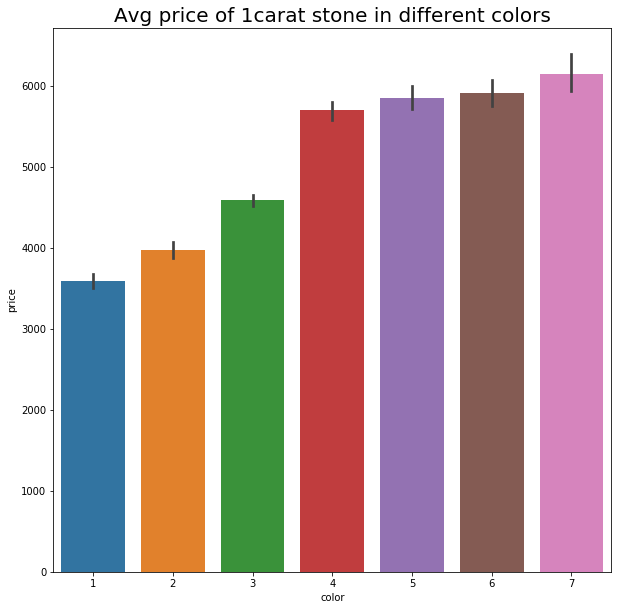

In [54]:
#1 stands for J and 7 for D
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='color',data=zirconia_df[zirconia_df.carat.round(1)==1])
a.set_title('Avg price of 1carat stone in different colors',fontsize=20)

Text(0.5, 1.0, 'Avg price of 1carat Vs Cut')

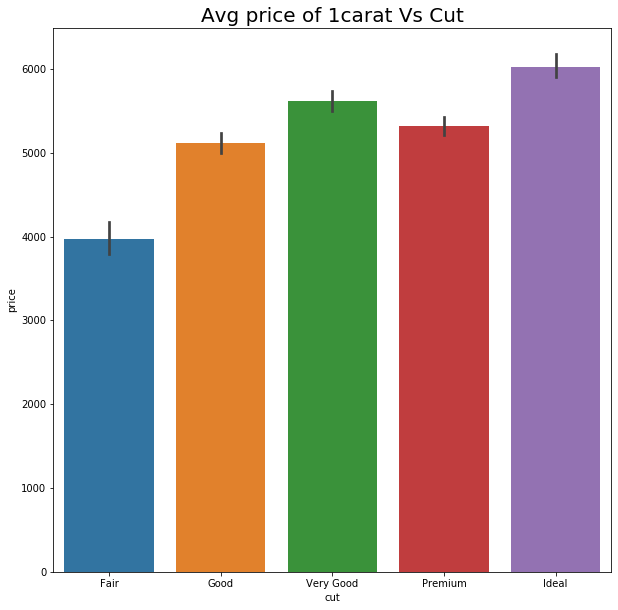

In [87]:
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='cut',data=zirconia_df_copy[zirconia_df_copy.carat.round(1)==1],order=['Fair','Good','Very Good','Premium','Ideal'])
a.set_title('Avg price of 1carat Vs Cut',fontsize=20)

Text(0.5, 1.0, 'Avg price of 2 carat Vs Cut')

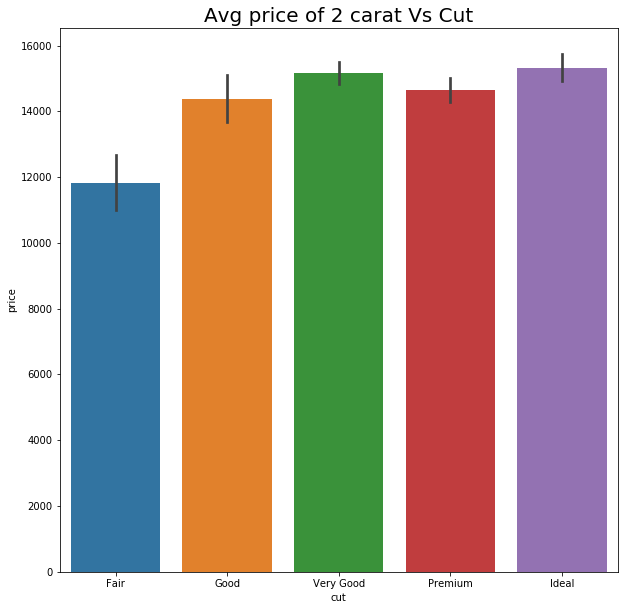

In [93]:
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='cut',data=zirconia_df_copy[zirconia_df_copy.carat.round(1)==2],order=['Fair','Good','Very Good','Premium','Ideal'])
a.set_title('Avg price of 2 carat Vs Cut',fontsize=20)

Text(0.5, 1.0, 'Avg price of 2+ carat Vs Cut')

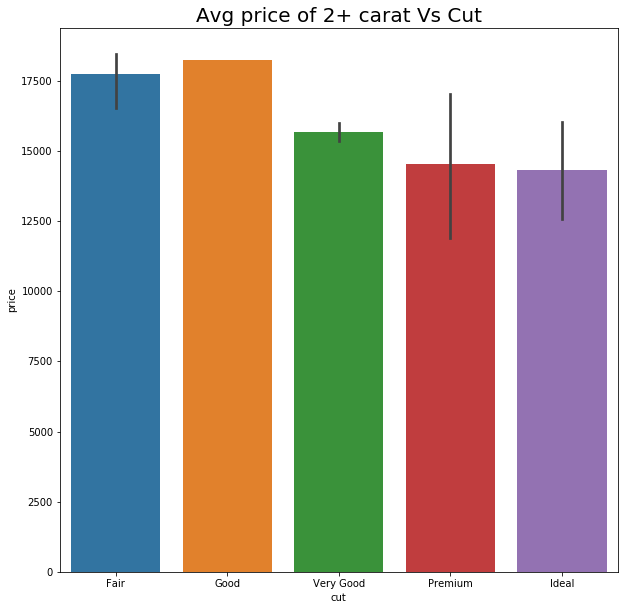

In [97]:
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='cut',data=zirconia_df_copy[zirconia_df_copy.carat.round(2)>3],order=['Fair','Good','Very Good','Premium','Ideal'])
a.set_title('Avg price of 2+ carat Vs Cut',fontsize=20)

Text(0.5, 1.0, 'Avg price of 1carat Vs Cut')

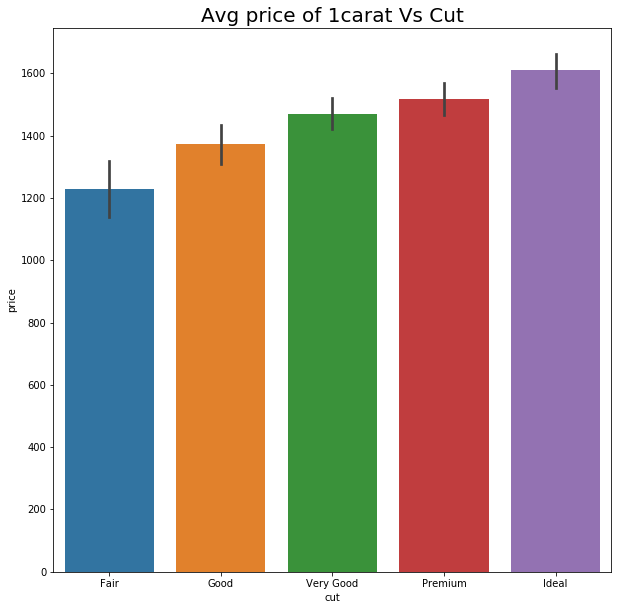

In [91]:
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='cut',data=zirconia_df_copy[zirconia_df_copy.carat.round(2)==0.5],order=['Fair','Good','Very Good','Premium','Ideal'])
a.set_title('Avg price of .5 carat Vs Cut',fontsize=20)

Text(0.5, 1.0, 'Avg price of 1carat stone in different colors')

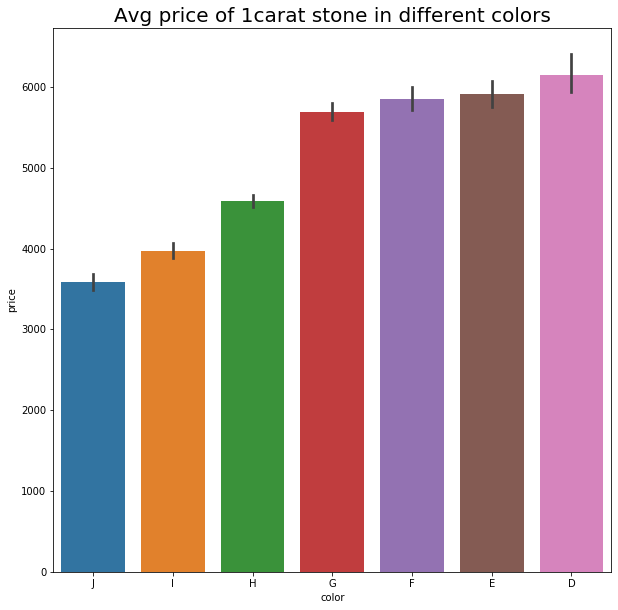

In [82]:
#1 stands for J and 7 for D
plt.figure(figsize=(10,10))
a=sns.barplot(y='price',x='color',data=zirconia_df_copy[zirconia_df_copy.carat.round(1)==1],order=['J','I','H','G','F','E','D'])
a.set_title('Avg price of 1carat stone in different colors',fontsize=20)

Text(0.5, 1.0, 'Price vs Carat Wt.')

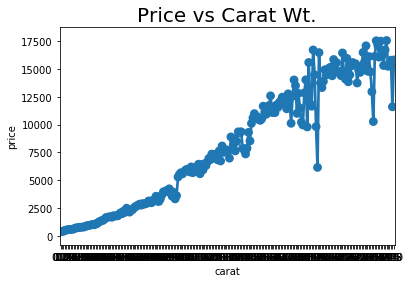

In [85]:
#Price of diamond increases linearly with carat till carat wt = 2.5. After that there is some fluctuation
a=sns.pointplot(data_outliers1.carat,data_outliers1.price,ci=None)
a.set_title('Price vs Carat Wt.',fontsize=20)

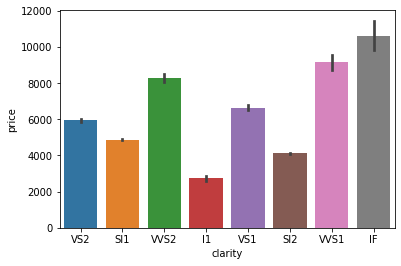

In [522]:
sns.barplot(y='price',x='clarity',data=zirconia_df[zirconia_df.carat.round(1)==1])

Text(0.5, 1.0, 'Avg price of 1carat stone vs Clarity')

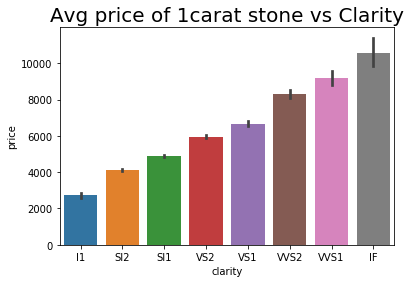

In [84]:
a=sns.barplot(y='price',x='clarity',data=zirconia_df_copy[zirconia_df_copy.carat.round(1)==1],order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
a.set_title('Avg price of 1carat stone vs Clarity',fontsize=20)